In [1]:
n = 7 
k = 4 
m = n-k 
t = 1 

codeword = [0, 0, 0, 0, 0, 0, 0]

p_values = [0.01, 0.05, 0.07, 0.1, 0.2, 0.5]

In [2]:
def calc_correct_prob(p):
    num_correct = 0
    num_iterations = 1000
    
    for i in range(num_iterations):
        received_codeword = [bit if random() > p else 1-bit for bit in codeword]
        
        syndrome = [(received_codeword[0]+received_codeword[2]+received_codeword[4])%2,
                    (received_codeword[1]+received_codeword[2]+received_codeword[5])%2,
                    (received_codeword[3]+received_codeword[4]+received_codeword[5])%2]
        
        if sum(syndrome) > t:
            pass
        elif sum(syndrome) == 1:
            error_bit = sum([2**i*syndrome[i] for i in range(m)])
            received_codeword[error_bit-1] = 1 - received_codeword[error_bit-1]
        
        if received_codeword == codeword:
            num_correct += 1
    
    return N(num_correct/num_iterations, digits = 3)

correct_probs = [calc_correct_prob(p) for p in p_values]

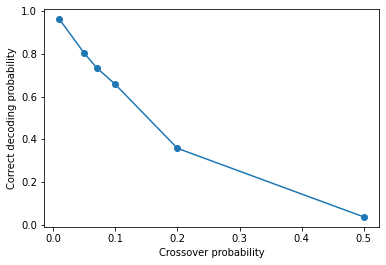

[0.962, 0.803, 0.735, 0.657, 0.358, 0.0370]

In [3]:
import matplotlib.pyplot as plt
plt.plot(p_values, correct_probs, 'o-')
plt.xlabel('Crossover probability')
plt.ylabel('Correct decoding probability')
plt.show()
correct_probs